# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** Ignatius Gilbert Wicaksana
- **Email:** ignatius.gilbert.wicaksana@mail.ugm.ac.id
- **ID Dicoding:** M008B4KY1912

## Menentukan Pertanyaan Bisnis

- How do cities' pollution respond to it's respective weather condition?
- Do cities with similar weather condition experience similar pollution trends?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np, pandas as pd, streamlit as st, os, matplotlib.pyplot as plt, seaborn as sns, matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

## Data Wrangling

### Gathering Data

Automation of gathering data, since there is a lot of csv files

Defining folder path to the csv files and making an empy list to store the dataframes

In [2]:
folderPath = "C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\PRSA_Data_20130301-20170228"

dfs = []

Looping through the folder to read every csv files while adding a new 'city' column

In [3]:
for CSVfile in os.listdir(folderPath):
    if CSVfile.endswith('.csv'):
        filePath = os.path.join(folderPath, CSVfile)
        df = pd.read_csv(filePath)
        dfs.append(df)

Combines all of the dataframes

In [4]:
combinedDF = pd.concat(dfs, axis=0, ignore_index=True)

Saving the combined dataframe to a new csv file

In [5]:
combinedDF.to_csv('C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\CombinedData.csv', index=False)

**Insight:**
- Automation on gathering data makes it so much easier to do and faster too
- Having a file naming system might look simple, but it really helps out a lot to stay organized 

### Assessing Data

In [6]:
print(combinedDF.dtypes)

combinedDF['datetime'] = pd.to_datetime(combinedDF[['year', 'month', 'day', 'hour']])

No           int64
year         int64
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


In [7]:
combinedDF = combinedDF.drop(['year', 'month', 'day', 'hour'], axis=1)
combinedDF.to_csv('C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\CombinedData_better.csv', index=False)

In [8]:
combinedDF.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


Used chatgpt to tell me what each of these elements are

Here’s a list of short explanations for each element in your dataset:

1. **PM2.5**: **Particulate Matter ≤ 2.5 micrometers** – Fine inhalable particles that can penetrate the respiratory system, often associated with health risks.
2. **PM10**: **Particulate Matter ≤ 10 micrometers** – Coarse inhalable particles that can affect the respiratory system, though less harmful than PM2.5.
3. **SO2**: **Sulfur Dioxide** – A gas produced by volcanic eruptions and industrial processes, known for contributing to air pollution and acid rain.
4. **NO2**: **Nitrogen Dioxide** – A pollutant primarily produced by motor vehicles and industrial activity, associated with respiratory problems and smog formation.
5. **CO**: **Carbon Monoxide** – A colorless, odorless gas resulting from incomplete combustion, harmful in high concentrations and can reduce oxygen delivery in the body.
6. **O3**: **Ozone** – A gas found both in the earth’s upper atmosphere (protective layer) and at ground level (harmful pollutant causing respiratory issues).
7. **TEMP**: **Temperature** – The air temperature, usually measured in degrees Celsius, influencing weather conditions and pollutant dispersion.
8. **PRES**: **Atmospheric Pressure** – The weight of the atmosphere pressing down on the earth’s surface, often measured in hectopascals (hPa) or millibars (mb).
9. **DEWP**: **Dew Point** – The temperature at which air becomes saturated with moisture and dew forms, an indicator of humidity levels.
10. **RAIN**: **Rainfall** – The amount of precipitation, typically measured in millimeters (mm), which can affect air quality by removing pollutants from the atmosphere.
11. **wd**: **Wind Direction** – The direction from which the wind is blowing, usually measured in degrees (0 to 360) or compass points (N, E, S, W).
12. **WSPM**: **Wind Speed in Meters per Second (m/s)** – The speed of wind, which influences the dispersion and movement of pollutants.
13. **station**: **Station Identifier** – The name or code of the air quality monitoring station where the data was collected.

These elements cover various meteorological and pollutant-related measurements that are essential for analyzing air quality and understanding the environmental conditions.

In [10]:
missingVal = combinedDF.isnull().sum()
print(missingVal)

No              0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64


In [37]:
combinedDF.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768.000000,420768
mean,17532.500000,75.825919,101.253743,13.325406,50.178072,1132.515347,55.522806,13.538976,1010.746982,2.490822,0.0,1.668456,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.0,0.000000,2013-03-01 00:00:00
25%,8766.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.0,0.900000,2014-03-01 05:45:00
50%,17532.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.0,1.400000,2015-03-01 11:30:00
75%,26298.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.0,2.200000,2016-02-29 17:15:00
max,35064.000000,241.000000,306.000000,43.000000,139.000000,3000.000000,182.000000,41.600000,1042.800000,29.100000,0.0,4.150000,2017-02-28 23:00:00
std,10122.116943,66.749711,79.118257,13.388484,33.127137,803.352181,49.898248,11.430729,10.469162,13.787240,0.0,1.061907,NaN


In [12]:
duplicates = combinedDF.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

combinedDF.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [13]:
floatCol = combinedDF.select_dtypes(include=['float64']).columns

In [14]:
outliersDict = {}

In [15]:
for col in floatCol:
    data = combinedDF[col].dropna()
    
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    
    iqr = q75 - q25
    
    cutOff = iqr * 1.5
    minVal, maxVal = q25 - cutOff, q75 + cutOff
    
    outliers = data[(data < minVal) | (data > maxVal)]
    
    outliersDict[col] = outliers

for col, outliers in outliersDict.items():
    print(f'\nOutliers in {col}')
    print(outliers)


Outliers in PM2.5
120       284.0
121       272.0
136       248.0
140       254.0
141       266.0
          ...  
420459    266.0
420460    264.0
420461    262.0
420462    261.0
420463    256.0
Name: PM2.5, Length: 19142, dtype: float64

Outliers in PM10
120       315.0
139       338.0
140       396.0
141       380.0
142       335.0
          ...  
420187    409.0
420188    389.0
420358    369.0
420359    410.0
420360    388.0
Name: PM10, Length: 14658, dtype: float64

Outliers in SO2
33        47.0
42        50.0
43        50.0
44        54.0
45        72.0
          ... 
420537    51.0
420538    56.0
420539    55.0
420540    52.0
420541    47.0
Name: SO2, Length: 35566, dtype: float64

Outliers in NO2
109       147.0
110       158.0
111       172.0
112       194.0
113       204.0
          ...  
420455    154.0
420456    162.0
420457    158.0
420458    151.0
420459    146.0
Name: NO2, Length: 7021, dtype: float64

Outliers in CO
117       3100.0
118       3200.0
119       4400.0
120

In [16]:
cutoff_values_iqr = {}

for col in floatCol:
    data = combinedDF[col].dropna()

    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    
    iqr = q75 - q25
    
    cutOff = iqr * 1.5
    minVal, maxVal = q25 - cutOff, q75 + cutOff
    
    cutoff_values_iqr[col] = {'lower_bound': minVal, 'upper_bound': maxVal}

for col, cutoffs in cutoff_values_iqr.items():
    print(f'\nCutoff values for {col}:')
    print(f"Lower bound: {cutoffs['lower_bound']}")
    print(f"Upper bound: {cutoffs['upper_bound']}")


Cutoff values for PM2.5:
Lower bound: -116.5
Upper bound: 247.5

Cutoff values for PM10:
Lower bound: -127.5
Upper bound: 308.5

Cutoff values for SO2:
Lower bound: -22.5
Upper bound: 45.5

Cutoff values for NO2:
Lower bound: -49.0
Upper bound: 143.0

Cutoff values for CO:
Lower bound: -1000.0
Upper bound: 3000.0

Cutoff values for O3:
Lower bound: -95.5
Upper bound: 188.5

Cutoff values for TEMP:
Lower bound: -27.199999999999996
Upper bound: 53.599999999999994

Cutoff values for PRES:
Lower bound: 977.2499999999999
Upper bound: 1044.0500000000002

Cutoff values for DEWP:
Lower bound: -44.9
Upper bound: 51.1

Cutoff values for RAIN:
Lower bound: 0.0
Upper bound: 0.0

Cutoff values for WSPM:
Lower bound: -1.0500000000000003
Upper bound: 4.15


**Insight:**
- Able to know the overall data and discover outliers.
- Outliers are then filtered out by using an upper and lower bound of the dataset to cutoff the outlier

### Cleaning Data

Number of missing vals

- No              0
- PM2.5        8739
- PM10         6449
- SO2          9021
- NO2         12116
- CO          20701
- O3          13277
- TEMP          398
- PRES          393
- DEWP          403
- RAIN          390
- wd           1822
- WSPM          318
- station         0
- datetime        0
- dtype: int64

Filling in missing values on 'wd' using forward fill since it's mostly dependent on the previous wind direction

In [17]:
combinedDF['wd'].fillna(method='ffill', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\1918992269.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combinedDF['wd'].fillna(method='ffill', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\1918992269.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combinedDF['wd'].fillna(method='ffill', inplace=True)


Filling in the rest of the missing values of other elements by its mean

In [18]:
for col in floatCol:
    meanVal = combinedDF[col].mean()
    combinedDF[col].fillna(meanVal, inplace=True)
    print(f"Filled missing values in '{col}' with mean: {meanVal}")

Filled missing values in 'PM2.5' with mean: 79.79342813248583
Filled missing values in 'PM10' with mean: 104.6026175483142
Filled missing values in 'SO2' with mean: 15.830834699949245
Filled missing values in 'NO2' with mean: 50.63858559263139
Filled missing values in 'CO' with mean: 1230.7664541189351
Filled missing values in 'O3' with mean: 57.37227127961109
Filled missing values in 'TEMP' with mean: 13.538975833816355
Filled missing values in 'PRES' with mean: 1010.7469819844983
Filled missing values in 'DEWP' with mean: 2.490822023717484
Filled missing values in 'RAIN' with mean: 0.06447578132062096
Filled missing values in 'WSPM' with mean: 1.729710548222143


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\870648186.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combinedDF[col].fillna(meanVal, inplace=True)


Checking for remaining missing values

In [19]:
print("\nMissing values after filling:")
print(combinedDF.isnull().sum())


Missing values after filling:
No          0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


Getting rid of outliers by appointing each outlier by each max or min values

In [20]:
for col in floatCol:
    data = combinedDF[col].dropna()

    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cutOff = iqr * 1.5
    minVal, maxVal = q25 - cutOff, q75 + cutOff

    outliers = data[(data < minVal) | (data > maxVal)]

    combinedDF[col] = np.where(combinedDF[col] < minVal, minVal, combinedDF[col])
    combinedDF[col] = np.where(combinedDF[col] > maxVal, maxVal, combinedDF[col])

Saving the finalized clean data to a new .csv file

In [21]:
combinedDF.to_csv('C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\CombinedData_clean.csv', index=False)

Naming a new df cleanData to differentiate the new finalized clean data

In [22]:
cleanData = combinedDF

**Insight:**
- There's a lot of method to fill in missing values in a dataset, and choosing the right one to use is a challenge itself. 
- Outliers are a challenge to be dealt with since it mess with its mean, median, mode.
- Getting rid of outliers using their respective max and min value.

## Exploratory Data Analysis (EDA)

### Explore
- How each parameter correlates to each other
- What certain categories of pollution and weather parameters of each cities looks like

In [38]:
cleanData.describe()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.0,420768.000000,420768
mean,17532.500000,75.825919,101.253743,13.325406,50.178072,1132.515347,55.522806,13.538976,1010.746982,2.490822,0.0,1.668456,2015-03-01 11:30:00.000001024
min,1.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.0,0.000000,2013-03-01 00:00:00
25%,8766.750000,21.000000,36.000000,3.000000,24.000000,500.000000,12.000000,3.100000,1002.300000,-8.900000,0.0,0.900000,2014-03-01 05:45:00
50%,17532.500000,57.000000,84.000000,8.000000,45.000000,900.000000,47.000000,14.500000,1010.400000,3.000000,0.0,1.400000,2015-03-01 11:30:00
75%,26298.250000,109.000000,144.000000,19.000000,70.000000,1500.000000,80.000000,23.200000,1019.000000,15.100000,0.0,2.200000,2016-02-29 17:15:00
max,35064.000000,241.000000,306.000000,43.000000,139.000000,3000.000000,182.000000,41.600000,1042.800000,29.100000,0.0,4.150000,2017-02-28 23:00:00
std,10122.116943,66.749711,79.118257,13.388484,33.127137,803.352181,49.898248,11.430729,10.469162,13.787240,0.0,1.061907,NaN


Finding the correlation of each parameters

In [24]:
corrMat = cleanData[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'WSPM', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
print(corrMat)

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.887790  0.505757  0.654222  0.787676 -0.164638 -0.103756   
PM10   0.887790  1.000000  0.499627  0.660384  0.706479 -0.129248 -0.076610   
SO2    0.505757  0.499627  1.000000  0.525534  0.595294 -0.183179 -0.355486   
NO2    0.654222  0.660384  0.525534  1.000000  0.716556 -0.505889 -0.277288   
CO     0.787676  0.706479  0.595294  0.716556  1.000000 -0.363364 -0.308413   
O3    -0.164638 -0.129248 -0.183179 -0.505889 -0.363364  1.000000  0.598199   
TEMP  -0.103756 -0.076610 -0.355486 -0.277288 -0.308413  0.598199  1.000000   
WSPM  -0.300345 -0.225915 -0.109207 -0.419001 -0.353788  0.342080  0.057932   
PRES  -0.004400 -0.034996  0.255542  0.174915  0.173880 -0.448161 -0.813300   
DEWP   0.150588  0.097335 -0.304427 -0.030303 -0.017889  0.305958  0.820115   
RAIN        NaN       NaN       NaN       NaN       NaN       NaN       NaN   
WSPM  -0.300345 -0.225915 -0.109207 -0.419001 -0.353

In [25]:
floatCol = cleanData.select_dtypes(include=['float64']).columns
cleanData.groupby(by='station')[floatCol].mean()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
station,,,,,,,,,,,
Aotizhongxin,78.430448,106.172125,14.380430,58.272532,1145.747440,54.506327,13.584581,1011.846292,3.122702,0.0,1.662757
Changping,68.995703,92.654501,12.654174,44.152018,1069.825370,56.113851,13.685889,1007.764537,1.506985,0.0,1.768563
Dingling,63.944929,82.486959,10.853743,28.328798,885.826862,66.041709,13.685889,1007.764537,1.506985,0.0,1.768563
Dongsi,80.902070,105.631353,15.436709,53.132466,1217.060271,55.515527,13.671414,1012.546392,2.447559,0.0,1.788567
Guanyuan,78.757091,105.509141,14.368379,57.114508,1167.193178,54.121225,13.584581,1011.846292,3.122702,0.0,1.662757
Gucheng,79.251447,114.575961,13.130474,55.186871,1205.407364,55.789038,13.864051,1008.832326,2.610268,0.0,1.307048
Huairou,67.740478,89.828149,10.575150,33.281663,991.456790,57.768951,12.447016,1007.603327,2.239001,0.0,1.588912
Nongzhanguan,79.496300,104.842712,15.099088,57.265331,1193.968211,56.387319,13.671414,1012.546392,2.447559,0.0,1.788567
Shunyi,75.536875,96.009692,11.811011,44.016128,1098.922494,53.624841,13.388189,1013.058571,2.465075,0.0,1.729264


                  No          PM2.5           PM10            SO2  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean    17532.500000      75.825919     101.253743      13.325406   
min         1.000000       2.000000       2.000000       0.285600   
25%      8766.750000      21.000000      36.000000       3.000000   
50%     17532.500000      57.000000      84.000000       8.000000   
75%     26298.250000     109.000000     144.000000      19.000000   
max     35064.000000     241.000000     306.000000      43.000000   
std     10122.116943      66.749711      79.118257      13.388484   

                 NO2             CO             O3           TEMP  \
count  420768.000000  420768.000000  420768.000000  420768.000000   
mean       50.178072    1132.515347      55.522806      13.538976   
min         1.026500     100.000000       0.214200     -19.900000   
25%        24.000000     500.000000      12.000000       3.100000   
50%        45.000000     900.000000      47.000000      14.500000   
75%        70.000000    1500.000000      80.000000      23.200000   
max       139.000000    3000.000000     182.000000      41.600000   
std        33.127137     803.352181      49.898248      11.430729   

                PRES           DEWP      RAIN           WSPM  \
count  420768.000000  420768.000000  420768.0  420768.000000   
mean     1010.746982       2.490822       0.0       1.668456   
min       982.400000     -43.400000       0.0       0.000000   
25%      1002.300000      -8.900000       0.0       0.900000   
50%      1010.400000       3.000000       0.0       1.400000   
75%      1019.000000      15.100000       0.0       2.200000   
max      1042.800000      29.100000       0.0       4.150000   
std        10.469162      13.787240       0.0       1.061907   

Grouping pollution parameters

In [26]:
PollLabels = ['Low', 'Normal', 'High']

PM25Bins = [2., 21., 109., 241.]
cleanData['PM25_Category'] = pd.cut(cleanData['PM2.5'], bins=PM25Bins, labels=PollLabels)

PM10Bins = [2., 36., 144., 306.]
cleanData['PM10_Category'] = pd.cut(cleanData['PM10'], bins=PM10Bins, labels=PollLabels)

SO2Bins = [0.2, 3., 19., 43.]
cleanData['SO2_Category'] = pd.cut(cleanData['SO2'], bins=SO2Bins, labels=PollLabels)

NO2Bins = [1., 24., 70., 139.]
cleanData['NO2_Category'] = pd.cut(cleanData['NO2'], bins=NO2Bins, labels=PollLabels)

COBins = [100., 500., 1500., 3000.]
cleanData['CO_Category'] = pd.cut(cleanData['CO'], bins=COBins, labels=PollLabels)

O3Bins = [0.2, 12., 80., 182.]
cleanData['O3_Category'] = pd.cut(cleanData['O3'], bins=O3Bins, labels=PollLabels)

# print(cleanData[['station', 'PM25_Category', 'PM10_Category', 'SO2_Category', 'NO2_Category', 'CO_Category', 'O3_Category']].head())

In [27]:
PollutionGroups = (
    cleanData.groupby(
        ['station', 'PM25_Category', 'PM10_Category', 'SO2_Category', 'NO2_Category', 'CO_Category', 'O3_Category']
    ).agg(
        Count=('station', 'size'), 
        DateTimes=('datetime', list)
    ).reset_index()
)

PollutionGroups = PollutionGroups[PollutionGroups['Count'] > 0]

print(PollutionGroups)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\3674489742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleanData.groupby(


            station PM25_Category PM10_Category SO2_Category NO2_Category  \
1      Aotizhongxin           Low           Low          Low          Low   
2      Aotizhongxin           Low           Low          Low          Low   
4      Aotizhongxin           Low           Low          Low          Low   
5      Aotizhongxin           Low           Low          Low          Low   
7      Aotizhongxin           Low           Low          Low          Low   
...             ...           ...           ...          ...          ...   
8743  Wanshouxigong          High          High         High         High   
8744  Wanshouxigong          High          High         High         High   
8745  Wanshouxigong          High          High         High         High   
8746  Wanshouxigong          High          High         High         High   
8747  Wanshouxigong          High          High         High         High   

     CO_Category O3_Category  Count  \
1            Low      Normal    686 

In [28]:
PollutionGroups.to_csv('C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\Pollution_Groups.csv', index=False)

In [29]:
pivotTablePollution = PollutionGroups.pivot_table(
    index='station',
    columns=['PM25_Category', 'PM10_Category', 'SO2_Category', 'NO2_Category', 'CO_Category', 'O3_Category'],
    values='Count',
    fill_value=0
)

pivotTablePollution = pivotTablePollution.loc[:, pivotTablePollution.sum(axis=0) >= 2500]

print(pivotTablePollution)

PM25_Category     Low                                                      \
PM10_Category     Low                                              Normal   
SO2_Category      Low                 Normal                          Low   
NO2_Category      Low         Normal     Low         Normal           Low   
CO_Category       Low            Low     Low            Low Normal    Low   
O3_Category    Normal    High Normal  Normal   High  Normal Normal Normal   
station                                                                     
Aotizhongxin    686.0   584.0  598.0  1144.0  484.0   688.0  572.0  154.0   
Changping      1483.0   765.0  728.0  1095.0  233.0   601.0  605.0  327.0   
Dingling       2718.0  1542.0  240.0  2024.0  626.0    89.0   80.0  446.0   
Dongsi         1031.0   690.0  604.0   895.0  248.0   693.0  668.0  281.0   
Guanyuan       1010.0   508.0  742.0   725.0  139.0   893.0  478.0  302.0   
Gucheng        1326.0   781.0  323.0  1017.0  306.0   197.0  477.0  281.0   

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\1399355389.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotTablePollution = PollutionGroups.pivot_table(


Grouping weather parameters

In [30]:
tempBins = [-19.9, 3.1, 23.2, 41.6]
tempLabels = ['Cold', 'Mild', 'Hot']
cleanData['TEMP_Category'] = pd.cut(cleanData['TEMP'], bins=tempBins, labels=tempLabels)

presBins = [982.4, 1002.3, 1019., 1042.8]  
presLabels = ['Low', 'Normal', 'High']
cleanData['PRES_Category'] = pd.cut(cleanData['PRES'], bins=presBins, labels=presLabels)

dewpBins = [-43.4, -8.9, 15.1, 29.1] 
dewpLabels = ['Dry', 'Moderate', 'Humid']
cleanData['DEWP_Category'] = pd.cut(cleanData['DEWP'], bins=dewpBins, labels=dewpLabels)

wspmBins = [0, 0.9, 2.2, 4.2]  
wspmLabels = ['Calm', 'Breezy', 'Windy']
cleanData['WSPM_Category'] = pd.cut(cleanData['WSPM'], bins=wspmBins, labels=wspmLabels)

# print(cleanData[['station', 'TEMP_Category', 'PRES_Category', 'DEWP_Category', 'WSPM_Category']].head())

In [31]:
weatherGroups = (
    cleanData.groupby(
        ['station', 'TEMP_Category', 'PRES_Category', 'DEWP_Category', 'WSPM_Category']
    ).agg(
        Count=('station', 'size'), 
        DateTimes=('datetime', list)
    ).reset_index()
)

weatherGroups = weatherGroups[weatherGroups['Count'] > 0]

print(weatherGroups)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\1021982753.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cleanData.groupby(


           station TEMP_Category PRES_Category DEWP_Category WSPM_Category  \
3     Aotizhongxin          Cold           Low      Moderate          Calm   
4     Aotizhongxin          Cold           Low      Moderate        Breezy   
9     Aotizhongxin          Cold        Normal           Dry          Calm   
10    Aotizhongxin          Cold        Normal           Dry        Breezy   
11    Aotizhongxin          Cold        Normal           Dry         Windy   
..             ...           ...           ...           ...           ...   
958  Wanshouxigong           Hot        Normal      Moderate        Breezy   
959  Wanshouxigong           Hot        Normal      Moderate         Windy   
960  Wanshouxigong           Hot        Normal         Humid          Calm   
961  Wanshouxigong           Hot        Normal         Humid        Breezy   
962  Wanshouxigong           Hot        Normal         Humid         Windy   

     Count                                          DateTimes  

In [32]:
weatherGroups.to_csv('C:\\COOLYEAH\\SEM7\\BANGKIT\\Proyek_Akhir_Dicoding\\Analisis_Data\\Weather_Groups.csv', index=False)

In [33]:
pivotTableWeather = weatherGroups.pivot_table(
    index='station',
    columns=['TEMP_Category', 'PRES_Category', 'DEWP_Category', 'WSPM_Category'],
    values='Count',
    fill_value=0
)

pivotTableWeather = pivotTableWeather.loc[:, pivotTableWeather.sum(axis=0) >= 2500]

print(pivotTableWeather)

TEMP_Category   Cold                                                         \
PRES_Category Normal                                   High                   
DEWP_Category    Dry                Moderate            Dry                   
WSPM_Category   Calm  Breezy  Windy     Calm  Breezy   Calm  Breezy   Windy   
station                                                                       
Aotizhongxin   315.0   412.0  221.0    533.0   613.0  769.0  1964.0  1582.0   
Changping      560.0  1194.0  654.0    579.0   893.0  618.0  1762.0  1318.0   
Dingling       560.0  1194.0  654.0    579.0   893.0  618.0  1762.0  1318.0   
Dongsi         262.0   405.0  163.0    457.0   471.0  757.0  2067.0  1845.0   
Guanyuan       315.0   412.0  221.0    533.0   613.0  769.0  1964.0  1582.0   
Gucheng        686.0   580.0  391.0   1000.0   471.0  996.0  1555.0  1064.0   
Huairou        808.0  1432.0  631.0   1091.0  1087.0  957.0  1861.0   703.0   
Nongzhanguan   262.0   405.0  163.0    457.0   471.0

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7420\98030427.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivotTableWeather = weatherGroups.pivot_table(


**Insight:**
- The weather and pollution parameters don't seem to be affecting each other that much
- Coincidentally every city in the dataset have almost the same weather condition, with some outliers of course
- Making a correlation matrix really help with the analysing process sinc it makes it clear which parameter affects which
- Grouping the paremeters based on each station helps with recognizing each cities pollution and weather situation

## Visualization & Explanatory Analysis

### Pertanyaan 1:
How do cities' pollution respond to it's respective weather condition?

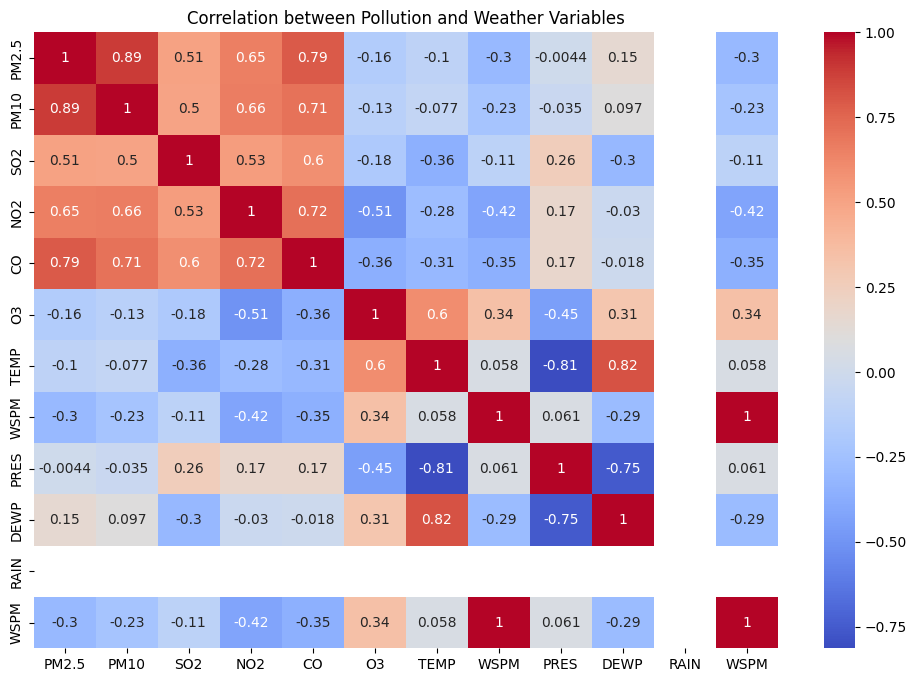

In [34]:
plt.figure(figsize=(12,8))
sns.heatmap(corrMat, annot=True, cmap='coolwarm')
plt.title('Correlation between Pollution and Weather Variables')
plt.show()

This correlation matrix shows that some parameters do indeed affect other parametes, such as:
- Almost every pollution parameters affects each other, with the level of PM2.5 and CO as the highest one with correlation value of 0.79
- An exception of this is the level of O3 which is affected a lot by the current temperature of the city
- The weather parameters also affects each other, with the level of TEMP and DEWP as the highest one with correlation value of 0.82

Note that (+) value means that each parameter positively affects each other, if one parameter goes up in value then the respective parameter will also go up in value. That also means a (-) value will negatively affect their respective parameter.

### Pertanyaan 2: 
Do cities with similar weather condition experience similar pollution trends?

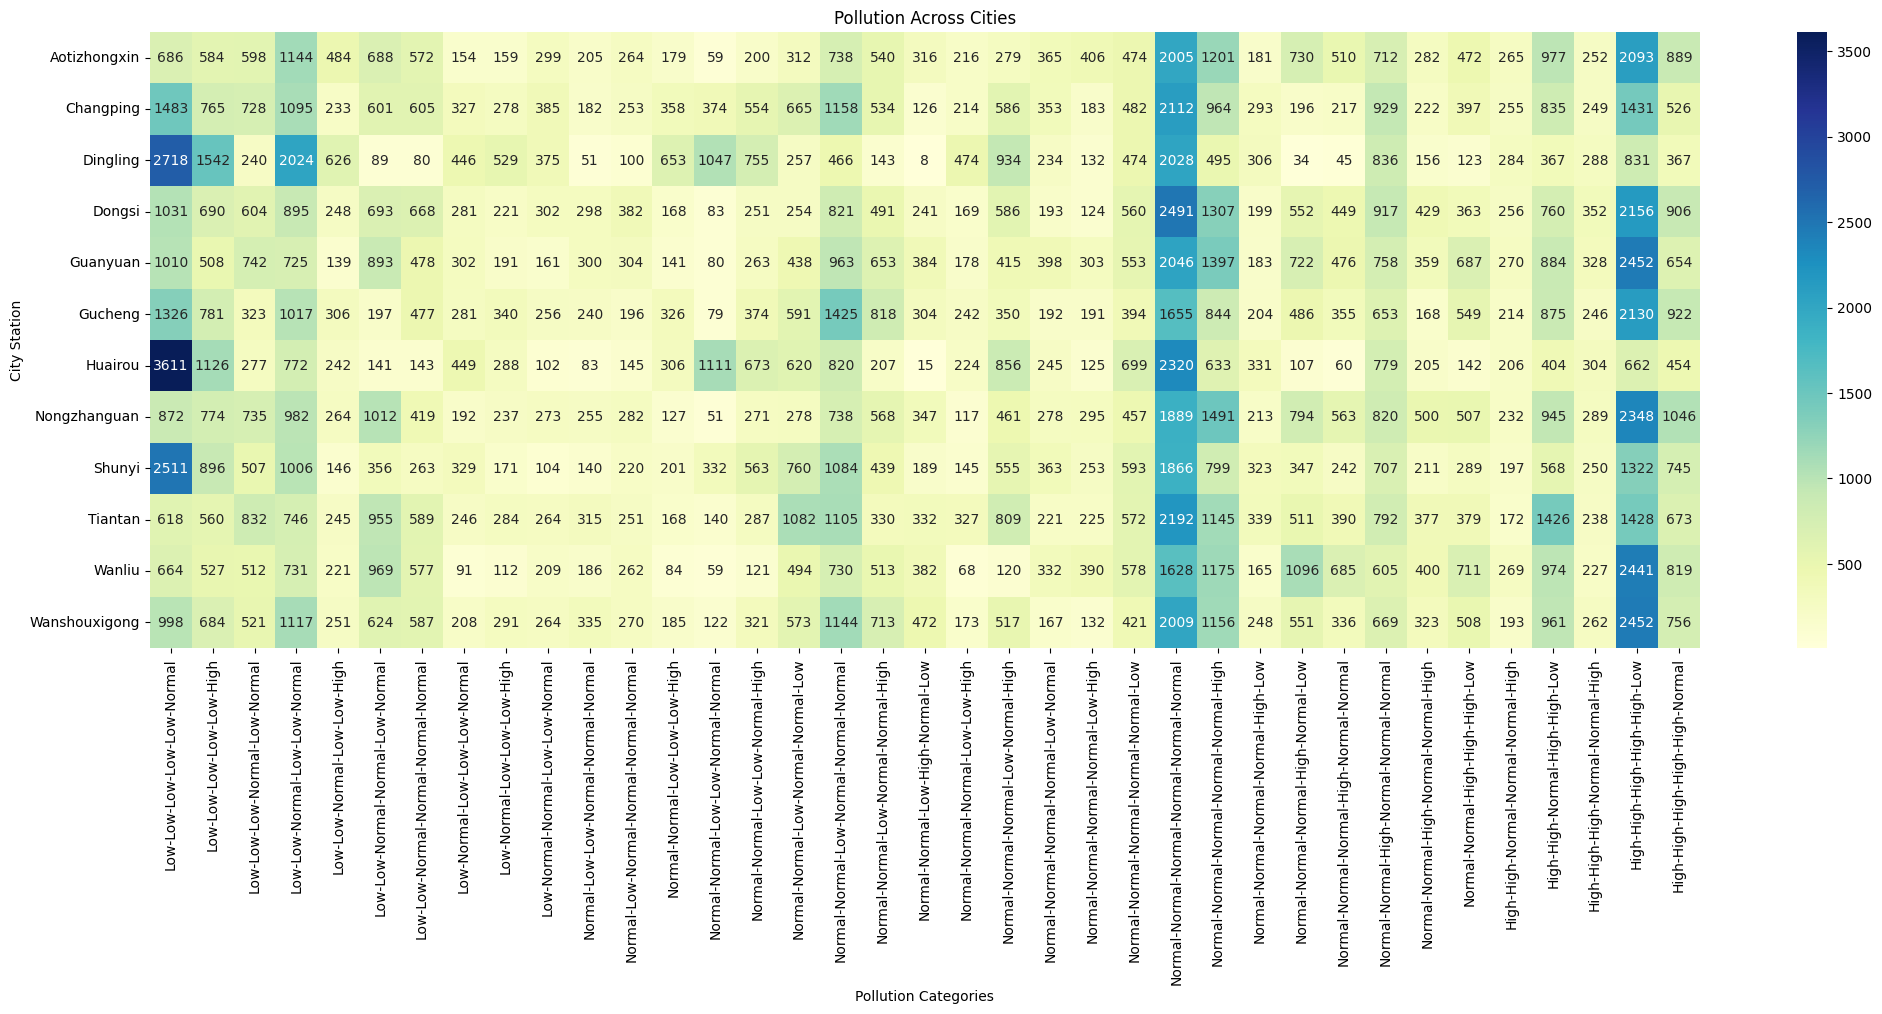

In [35]:
plt.figure(figsize=(25, 8))
sns.heatmap(pivotTablePollution, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Pollution Across Cities')
plt.xlabel('Pollution Categories')
plt.ylabel('City Station')
plt.show()

- Shunyi, Dingling, and Huairou have consistently high pollution counts, particularly for combinations involving high PM10, CO, and O3 levels, as indicated by darker blue colors in the matrix.
- Aotizhongxin and Dongsi appear to have relatively lower pollution levels in the majority of pollution categories (predominantly light green shades).
- Some combinations, such as "Normal-Low-Low-Normal-Low-High", seem to be prevalent across stations (Changping, Guanyuan, Tiantan), suggesting moderate but widespread pollution levels.

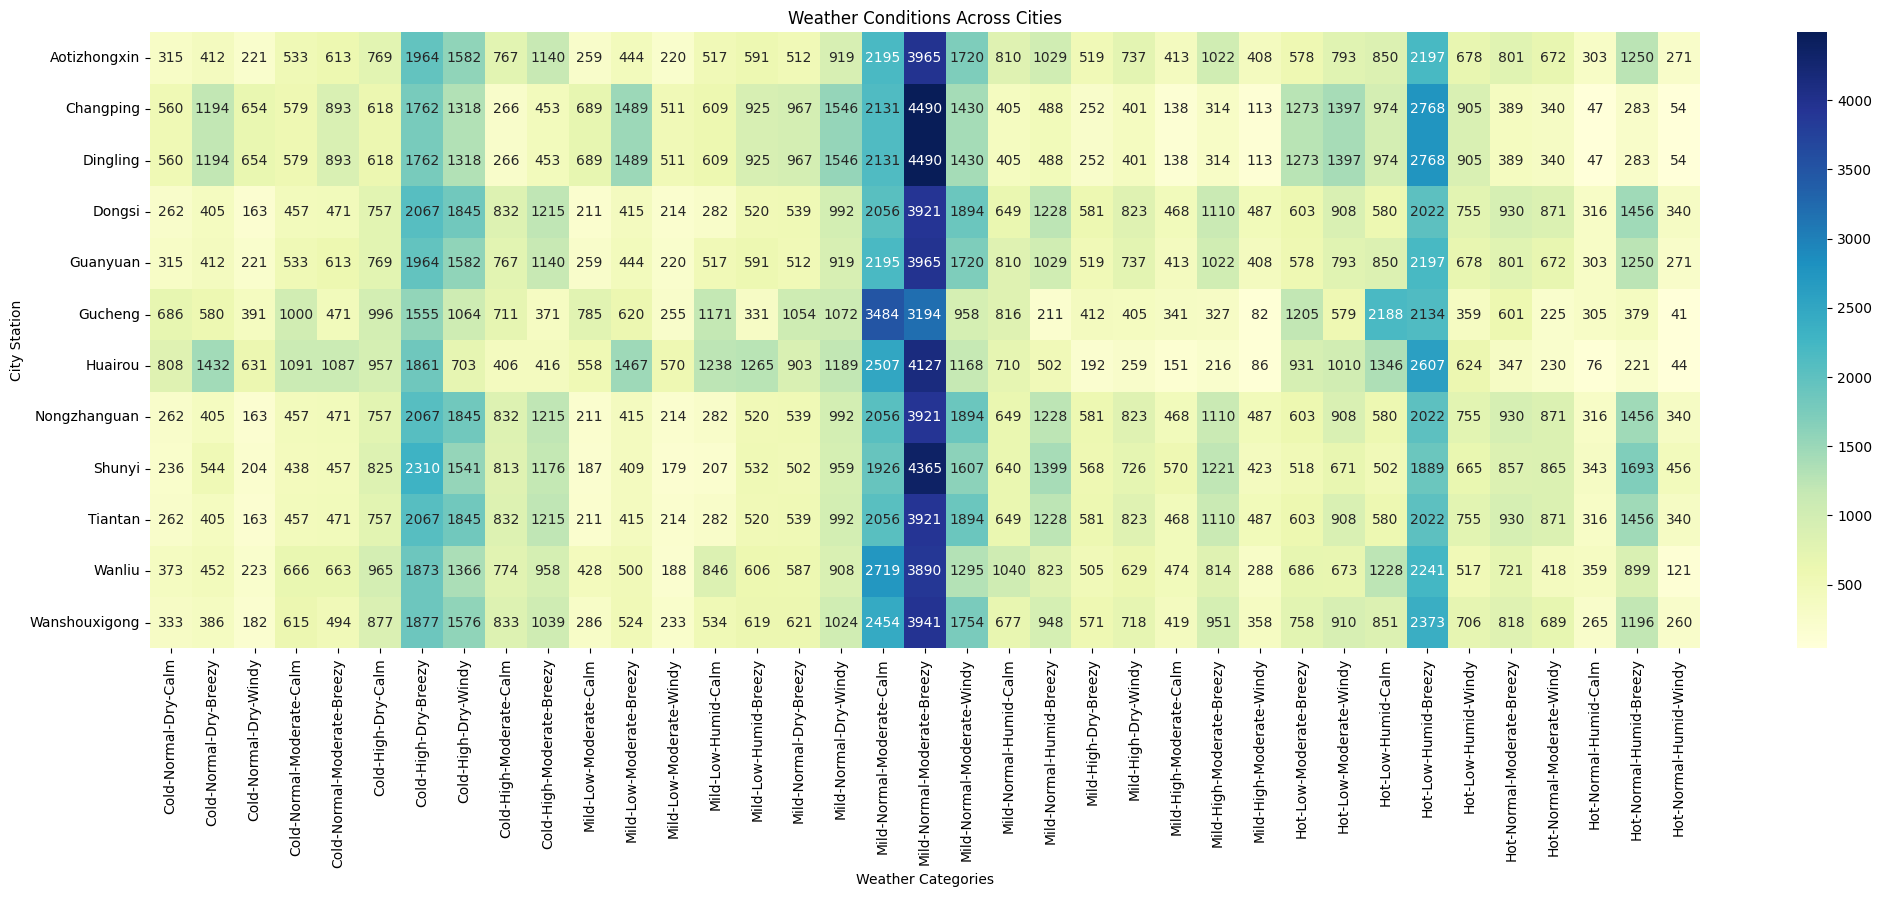

In [36]:
plt.figure(figsize=(25, 8))
sns.heatmap(pivotTableWeather, annot=True, cmap='YlGnBu', fmt='g')
plt.title('Weather Conditions Across Cities')
plt.xlabel('Weather Categories')
plt.ylabel('City Station')
plt.show()

- Shunyi and Guanyuan seem to experience frequent extreme weather conditions such as "Mild-Low-Humid-Breezy" and "Cold-Normal-Moderate-Breezy" (dark blue areas).
- Stations like Huairou show consistently higher values across various weather categories, indicating more variability or extremes in weather patterns compared to other stations.
- Tiantan and Nongzhanguan show relatively stable weather conditions (lighter green areas) with moderate occurrences across different combinations, such as "Cold-Normal-Dry-Calm".

**Insight:**
- Visualization using matrix and heatmap are really good, since we can clearly see how the data plays out.

## Conclusion

### Conclution to the first question
The correlation matrix doesn't show any significant relation within a city's weather condition and it's pollution.

### Conclution to the second question
Stations with more extreme or calm weather conditions tend to show higher pollution levels.